import the libraries and load the dataset:

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

Load the dataset:

In [3]:
# Dataset has no header, so we need to specify column names
column_names = ['checking_account', 'duration', 'credit_history', 'purpose', 
                'credit_amount', 'savings_account', 'employment_since', 
                'installment_rate', 'personal_status', 'other_debtors', 
                'residence_since', 'property', 'age', 'other_installments', 
                'housing', 'existing_credits', 'job', 'dependents', 
                'telephone', 'foreign_worker', 'class']

data = pd.read_csv('german.data', sep=' ', header=None, names=column_names)

check the data has been uccessfully loaded:

In [5]:
# Display basic information
print("Dataset Shape:", data.shape)
print("\nFirst 5 rows:")
print(data.head())
print("\nDataset Info:")
print(data.info())

Dataset Shape: (1000, 21)

First 5 rows:
  checking_account  duration credit_history purpose  credit_amount  \
0              A11         6            A34     A43           1169   
1              A12        48            A32     A43           5951   
2              A14        12            A34     A46           2096   
3              A11        42            A32     A42           7882   
4              A11        24            A33     A40           4870   

  savings_account employment_since  installment_rate personal_status  \
0             A65              A75                 4             A93   
1             A61              A73                 2             A92   
2             A61              A74                 2             A93   
3             A61              A74                 2             A93   
4             A61              A73                 3             A93   

  other_debtors  ...  property age  other_installments housing  \
0          A101  ...      A121  67     

======================================================================

2.2 Understanding Features:

In [9]:
# Check data types
print("Data types of each column:")
print(data.dtypes)

Data types of each column:
checking_account      object
duration               int64
credit_history        object
purpose               object
credit_amount          int64
savings_account       object
employment_since      object
installment_rate       int64
personal_status       object
other_debtors         object
residence_since        int64
property              object
age                    int64
other_installments    object
housing               object
existing_credits       int64
job                   object
dependents             int64
telephone             object
foreign_worker        object
class                  int64
dtype: object


In [10]:
# Check unique values for categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print(f"\nNumber of categorical columns: {len(categorical_cols)}")
print("\nUnique values in categorical columns:")
for col in categorical_cols:
    print(f"{col}: {data[col].nunique()} unique values")


Number of categorical columns: 13

Unique values in categorical columns:
checking_account: 4 unique values
credit_history: 5 unique values
purpose: 10 unique values
savings_account: 5 unique values
employment_since: 5 unique values
personal_status: 4 unique values
other_debtors: 3 unique values
property: 4 unique values
other_installments: 3 unique values
housing: 3 unique values
job: 4 unique values
telephone: 2 unique values
foreign_worker: 2 unique values


In [12]:
# Check numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols.drop('class')  # Remove target variable
print(f"\nNumber of numerical columns: {len(numerical_cols)}")
print("Numerical columns:", list(numerical_cols))


Number of numerical columns: 7
Numerical columns: ['duration', 'credit_amount', 'installment_rate', 'residence_since', 'age', 'existing_credits', 'dependents']


======================================================================

2.3 Checking Data Quality:

In [13]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Check for duplicates
print(f"\nNumber of duplicate rows: {data.duplicated().sum()}")

# Basic statistics for numerical features
print("\nBasic statistics for numerical features:")
print(data[numerical_cols].describe())

Missing values in each column:
checking_account      0
duration              0
credit_history        0
purpose               0
credit_amount         0
savings_account       0
employment_since      0
installment_rate      0
personal_status       0
other_debtors         0
residence_since       0
property              0
age                   0
other_installments    0
housing               0
existing_credits      0
job                   0
dependents            0
telephone             0
foreign_worker        0
class                 0
dtype: int64

Number of duplicate rows: 0

Basic statistics for numerical features:
          duration  credit_amount  installment_rate  residence_since  \
count  1000.000000    1000.000000       1000.000000      1000.000000   
mean     20.903000    3271.258000          2.973000         2.845000   
std      12.058814    2822.736876          1.118715         1.103718   
min       4.000000     250.000000          1.000000         1.000000   
25%      12.000000   

Findings:
No missing values in the dataset
No duplicate rows
All features have valid values

====================================================================

2.4 Distribution of Numerical Features:

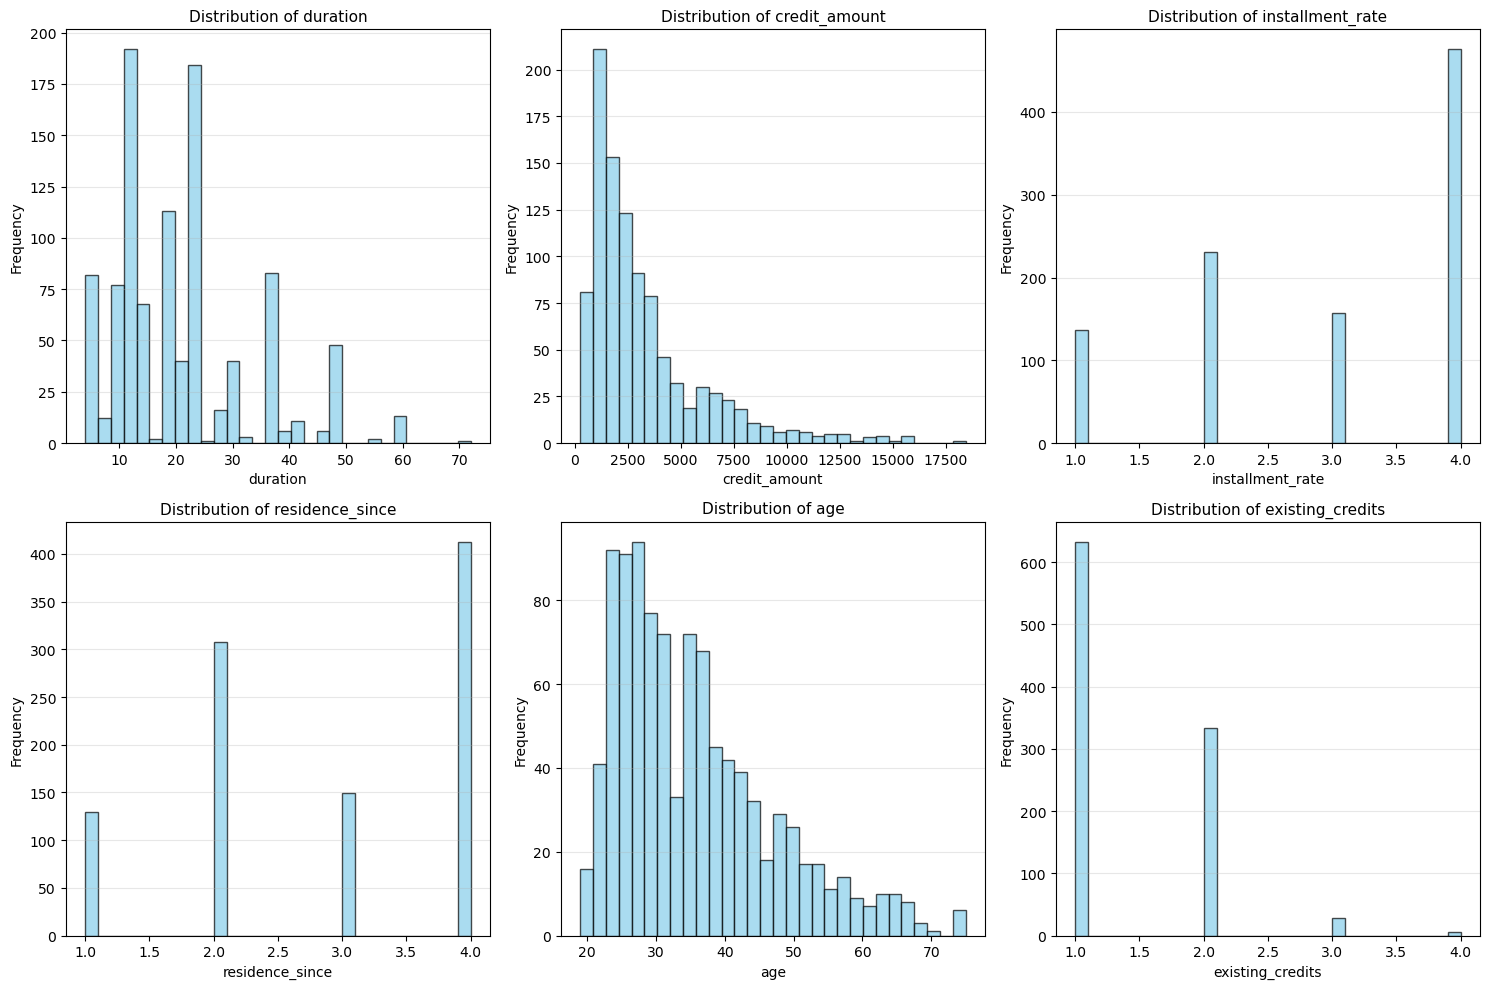

In [15]:
# Plot distribution of numerical features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

numerical_features = ['duration', 'credit_amount', 'installment_rate', 
                     'residence_since', 'age', 'existing_credits']

for i, col in enumerate(numerical_features):
    axes[i].hist(data[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribution of {col}', fontsize=11)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Observations:

Duration: Most credits are between 6-36 months

Credit Amount: Right-skewed, most loans are small (<10,000 DM)

Installment Rate: Most common is 4% of disposable income

Age: Ranges from 19 to 75, with most customers in 20-40 age range

Other features also show interesting patterns

====================================================================

2.5 Analyzing Categorical Features:

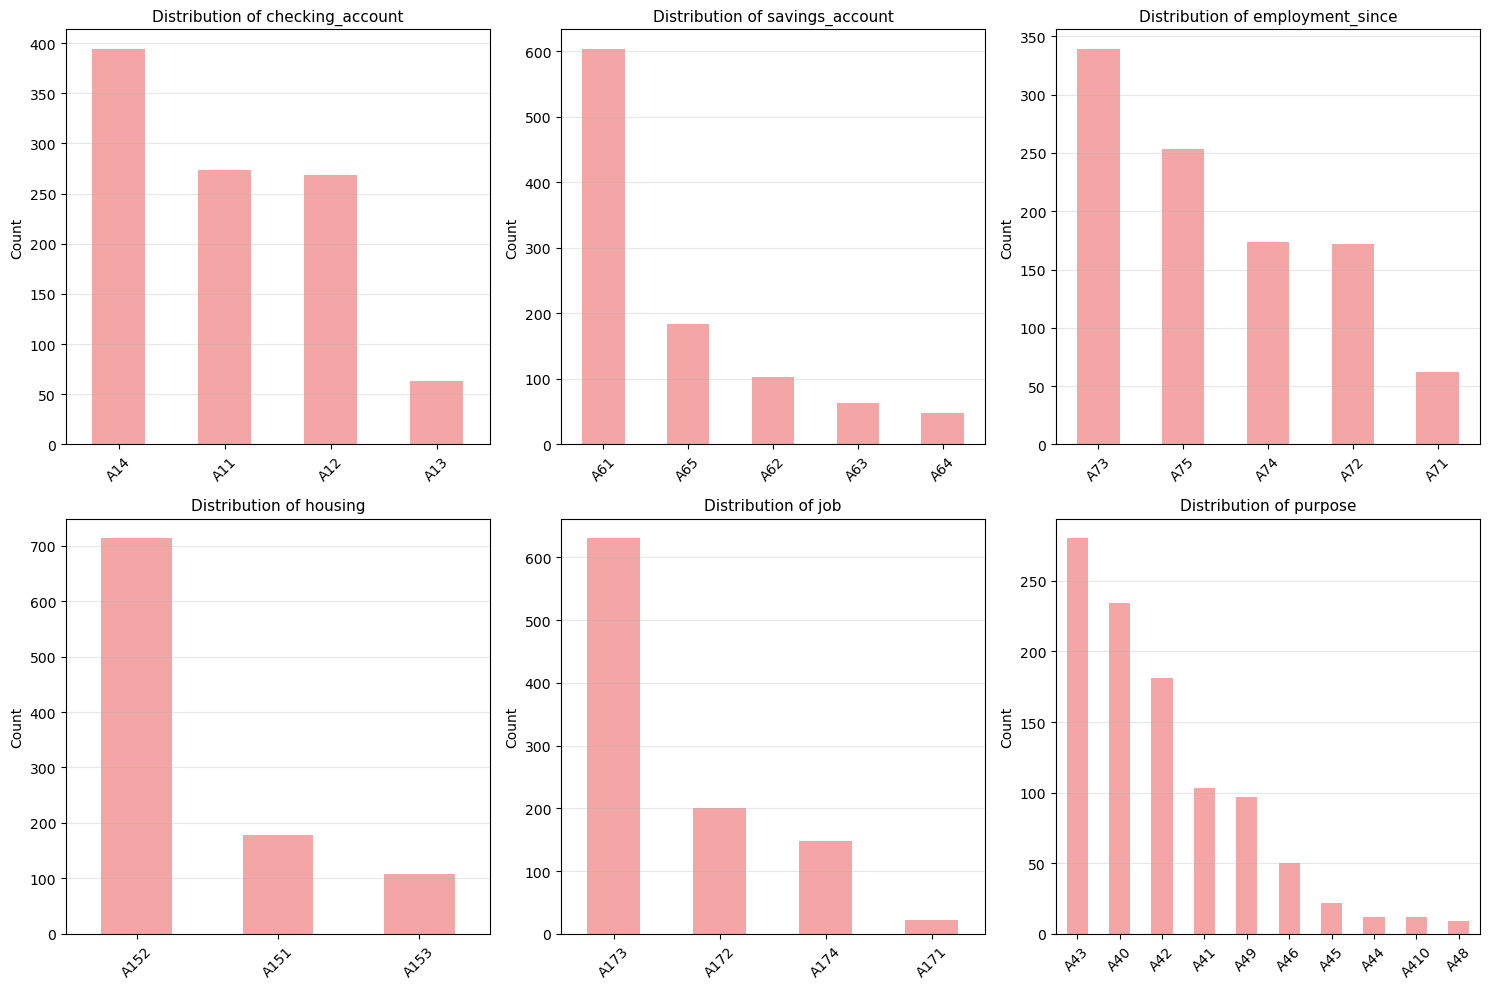

In [16]:
# Plot distribution of key categorical features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

categorical_features = ['checking_account', 'savings_account', 'employment_since', 
                       'housing', 'job', 'purpose']

for i, col in enumerate(categorical_features[:6]):
    data[col].value_counts().plot(kind='bar', ax=axes[i], color='lightcoral', alpha=0.7)
    axes[i].set_title(f'Distribution of {col}', fontsize=11)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Key Insights:

Many customers have little to no checking account balance,
Savings accounts vary widely,
Most customers have stable employment,
Most live in owned or rented housing,
Jobs range from unemployed to management

====================================================================

2.6 Relationship Between Key Features:

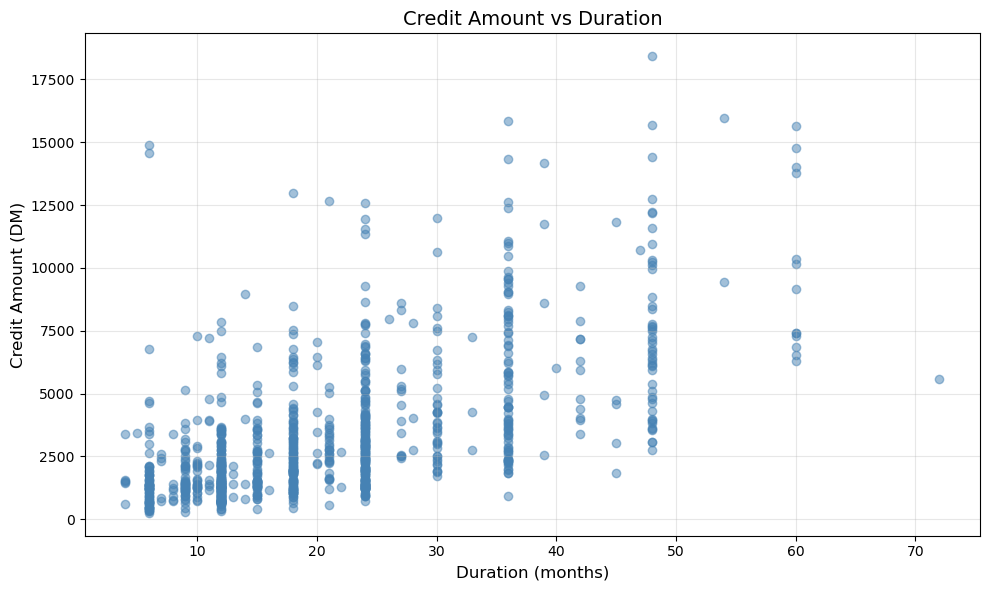

In [18]:
# Scatter plot: Credit Amount vs Duration
plt.figure(figsize=(10, 6))
plt.scatter(data['duration'], data['credit_amount'], alpha=0.5, color='steelblue')
plt.xlabel('Duration (months)', fontsize=12)
plt.ylabel('Credit Amount (DM)', fontsize=12)
plt.title('Credit Amount vs Duration', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

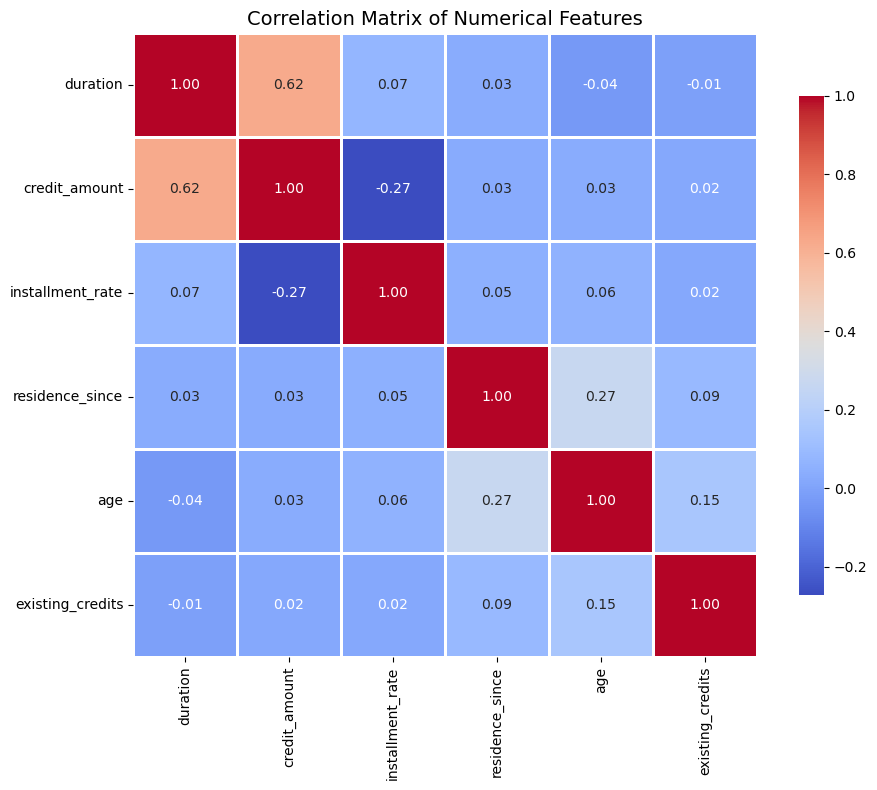

In [19]:
# Correlation between numerical features
correlation = data[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=14)
plt.tight_layout()
plt.show()

Findings:

Positive correlation between credit amount and duration,
Age has weak correlations with other features,
Most features are relatively independent

====================================================================

2.7 Age Distribution Analysis:

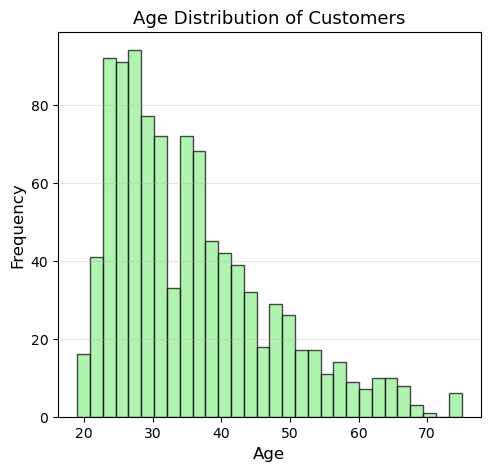

In [22]:
# Detailed age analysis
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(data['age'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Age Distribution of Customers', fontsize=13)
plt.grid(axis='y', alpha=0.3)

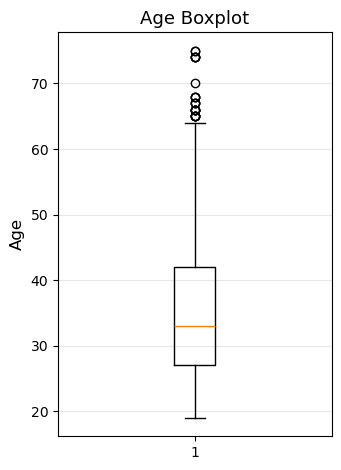

In [23]:
plt.subplot(1, 2, 2)
plt.boxplot(data['age'], vert=True)
plt.ylabel('Age', fontsize=12)
plt.title('Age Boxplot', fontsize=13)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [24]:
print("Age Statistics:")
print(data['age'].describe())

Age Statistics:
count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: age, dtype: float64


Most customers are young to middle-aged (20-40 years old), which is typical for credit applications.

====================================================================

2.8 Credit Amount Analysis by Purpose:

<Figure size 1200x600 with 0 Axes>

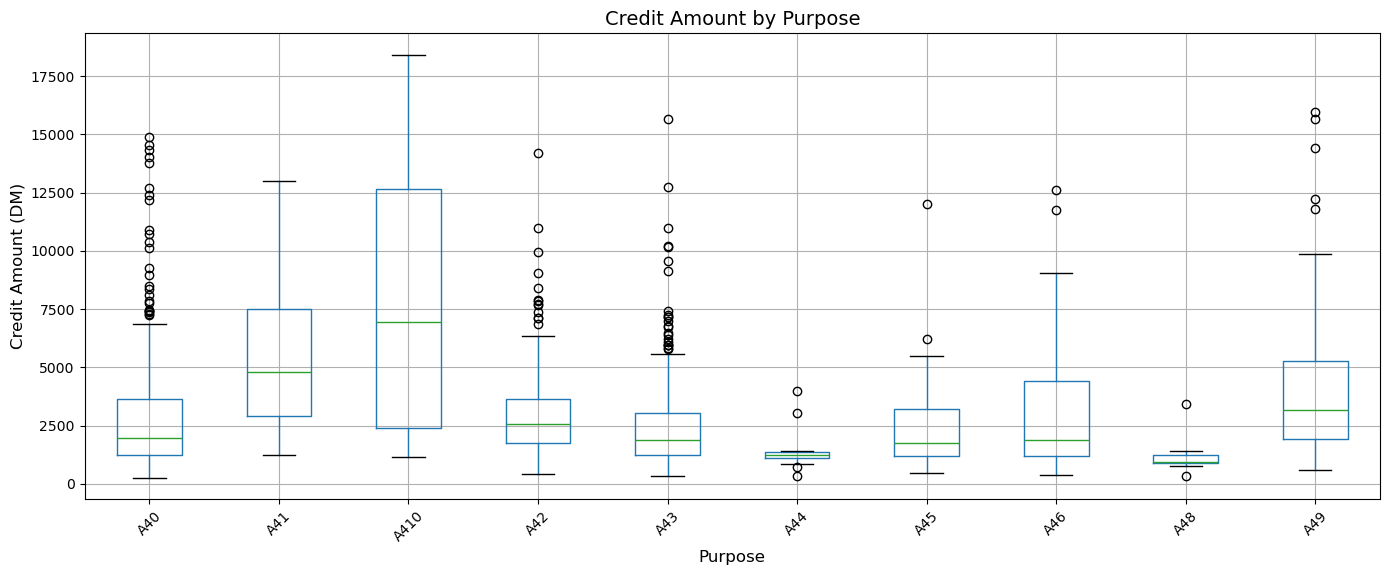

In [26]:
# Credit amount by purpose
plt.figure(figsize=(12, 6))
data.boxplot(column='credit_amount', by='purpose', figsize=(14, 6), rot=45)
plt.title('Credit Amount by Purpose', fontsize=14)
plt.suptitle('')  # Remove default title
plt.xlabel('Purpose', fontsize=12)
plt.ylabel('Credit Amount (DM)', fontsize=12)
plt.tight_layout()
plt.show()

In [27]:
# Average credit amount by purpose
avg_credit = data.groupby('purpose')['credit_amount'].mean().sort_values(ascending=False)
print("\nAverage Credit Amount by Purpose:")
print(avg_credit)


Average Credit Amount by Purpose:
purpose
A410    8209.333333
A41     5370.223301
A49     4158.041237
A46     3180.400000
A42     3066.988950
A40     3063.025641
A45     2728.090909
A43     2487.653571
A44     1498.000000
A48     1205.888889
Name: credit_amount, dtype: float64


Different purposes have different typical credit amounts. For example, car loans and business loans tend to be larger than furniture or education loans.

====================================================================

3. Data Preprocessing

3.1 Handling the Target Variable

In [29]:
# Remove the class label
data_for_clustering = data.drop('class', axis=1)

print("Data shape after removing target:", data_for_clustering.shape)
print("Columns:", data_for_clustering.columns.tolist())

Data shape after removing target: (1000, 20)
Columns: ['checking_account', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_account', 'employment_since', 'installment_rate', 'personal_status', 'other_debtors', 'residence_since', 'property', 'age', 'other_installments', 'housing', 'existing_credits', 'job', 'dependents', 'telephone', 'foreign_worker']


Now we have 1,000 samples with 20 features ready for preprocessing.

====================================================================

3.2 Encoding Categorical Variables:

In [30]:
# Identify categorical and numerical columns
categorical_columns = data_for_clustering.select_dtypes(include=['object']).columns.tolist()
numerical_columns = data_for_clustering.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Categorical columns ({len(categorical_columns)}): {categorical_columns}")
print(f"Numerical columns ({len(numerical_columns)}): {numerical_columns}")

Categorical columns (13): ['checking_account', 'credit_history', 'purpose', 'savings_account', 'employment_since', 'personal_status', 'other_debtors', 'property', 'other_installments', 'housing', 'job', 'telephone', 'foreign_worker']
Numerical columns (7): ['duration', 'credit_amount', 'installment_rate', 'residence_since', 'age', 'existing_credits', 'dependents']


In [31]:
# Label encoding for categorical variables
label_encoders = {}
data_encoded = data_for_clustering.copy()

for col in categorical_columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le
    print(f"Encoded {col}: {data_for_clustering[col].nunique()} unique values")

Encoded checking_account: 4 unique values
Encoded credit_history: 5 unique values
Encoded purpose: 10 unique values
Encoded savings_account: 5 unique values
Encoded employment_since: 5 unique values
Encoded personal_status: 4 unique values
Encoded other_debtors: 3 unique values
Encoded property: 4 unique values
Encoded other_installments: 3 unique values
Encoded housing: 3 unique values
Encoded job: 4 unique values
Encoded telephone: 2 unique values
Encoded foreign_worker: 2 unique values


In [32]:
print("\nFirst 5 rows after encoding:")
print(data_encoded.head())


First 5 rows after encoding:
   checking_account  duration  credit_history  purpose  credit_amount  \
0                 0         6               4        4           1169   
1                 1        48               2        4           5951   
2                 3        12               4        7           2096   
3                 0        42               2        3           7882   
4                 0        24               3        0           4870   

   savings_account  employment_since  installment_rate  personal_status  \
0                4                 4                 4                2   
1                0                 2                 2                1   
2                0                 3                 2                2   
3                0                 3                 2                2   
4                0                 2                 3                2   

   other_debtors  residence_since  property  age  other_installments  housing  \

All categorical variables are now converted to numerical values using Label Encoding.

====================================================================

3.3 Feature Scaling:

In [33]:
# Standardize all features using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

# Convert back to DataFrame for easier handling
data_scaled_df = pd.DataFrame(data_scaled, columns=data_encoded.columns)

print("Scaled data (first 5 rows):")
print(data_scaled_df.head())

print("\nScaled data statistics:")
print(data_scaled_df.describe())

Scaled data (first 5 rows):
   checking_account  duration  credit_history   purpose  credit_amount  \
0         -1.254566 -1.236478        1.344014  0.264068      -0.745131   
1         -0.459026  2.248194       -0.503428  0.264068       0.949817   
2          1.132053 -0.738668        1.344014  1.359785      -0.416562   
3         -1.254566  1.750384       -0.503428 -0.101171       1.634247   
4         -1.254566  0.256953        0.420293 -1.196889       0.566664   

   savings_account  employment_since  installment_rate  personal_status  \
0         1.833169          1.338078          0.918477         0.449326   
1        -0.699707         -0.317959         -0.870183        -0.963650   
2        -0.699707          0.510060         -0.870183         0.449326   
3        -0.699707          0.510060         -0.870183         0.449326   
4        -0.699707         -0.317959          0.024147         0.449326   

   other_debtors  residence_since  property       age  other_installments  \

Now all features have mean=0 and standard deviation=1, which is important for clustering algorithms (especially K-Means).

====================================================================

3.4 Checking for Outliers:

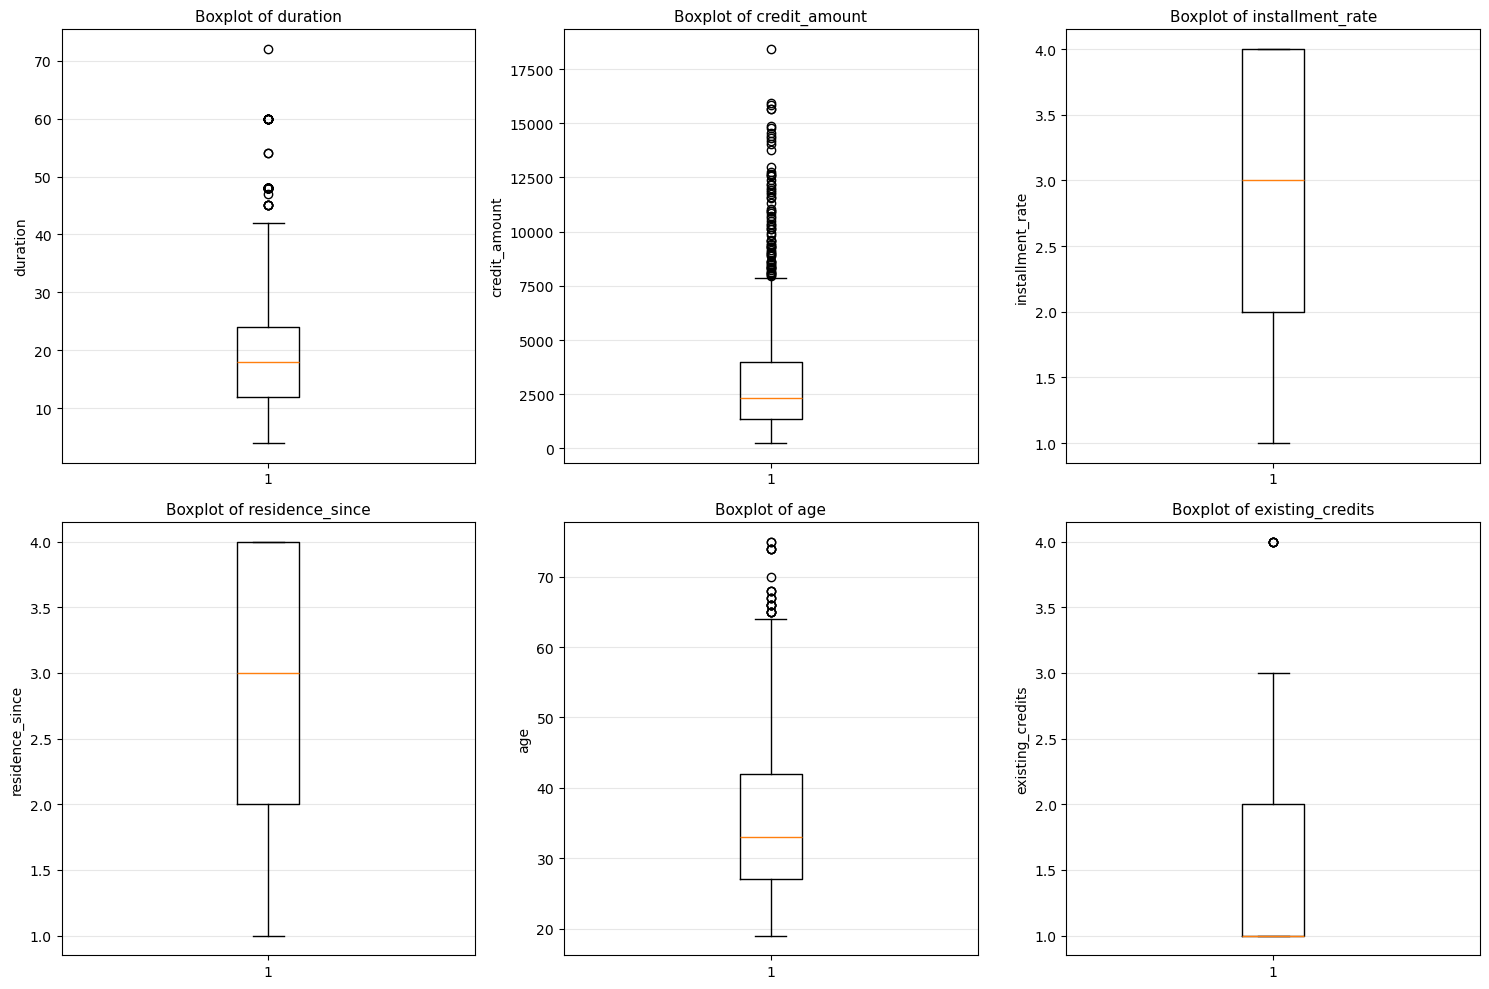

In [34]:
# Check for outliers in numerical features using boxplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_columns[:6]):
    axes[i].boxplot(data_for_clustering[col])
    axes[i].set_title(f'Boxplot of {col}', fontsize=11)
    axes[i].set_ylabel(col, fontsize=10)
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Some outliers exist in features like credit_amount and duration. However, I will keep them because they might represent valid customer segments (e.g., high-value customers with large loans).

====================================================================


4.2 Determining Optimal Number of Clusters
Using Elbow Method for K-Means:

C:\Users\Green\MLDM\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Green\MLDM\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Green\MLDM\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Green\MLDM\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when the

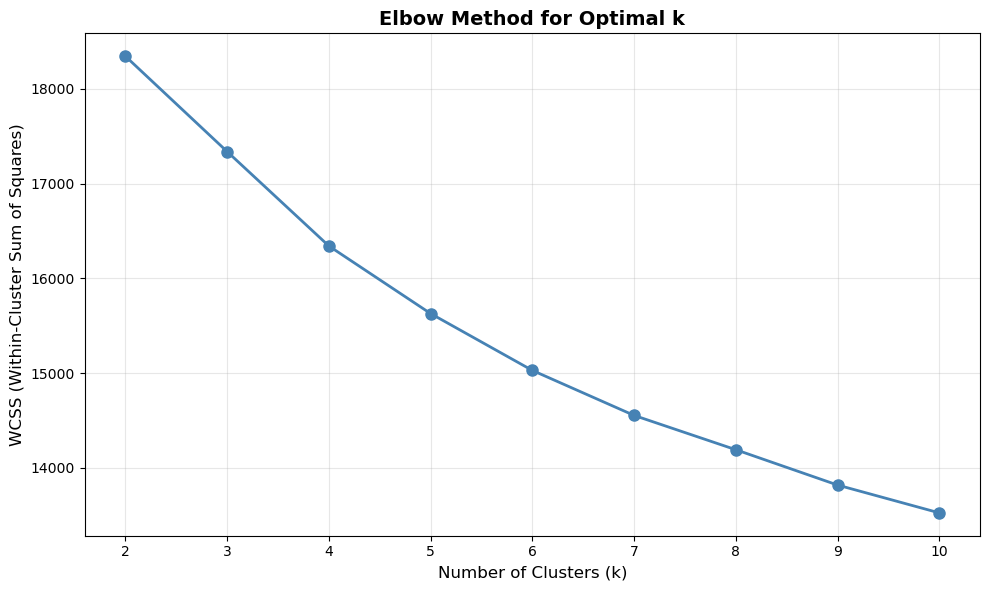

In [35]:
# Calculate WCSS (Within-Cluster Sum of Squares) for different k values
wcss = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linewidth=2, markersize=8, color='steelblue')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(k_range)
plt.tight_layout()
plt.show()

From the elbow curve, I can see the "elbow" point is around k=3 or k=4. The decrease in WCSS becomes less steep after these points.

Using Silhouette Score:

C:\Users\Green\MLDM\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Green\MLDM\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


k=2: Silhouette Score = 0.0823
k=3: Silhouette Score = 0.0738


C:\Users\Green\MLDM\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Green\MLDM\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


k=4: Silhouette Score = 0.0848
k=5: Silhouette Score = 0.0899


C:\Users\Green\MLDM\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Green\MLDM\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


k=6: Silhouette Score = 0.0913
k=7: Silhouette Score = 0.0823


C:\Users\Green\MLDM\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Green\MLDM\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


k=8: Silhouette Score = 0.0762
k=9: Silhouette Score = 0.0738


C:\Users\Green\MLDM\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


k=10: Silhouette Score = 0.0702


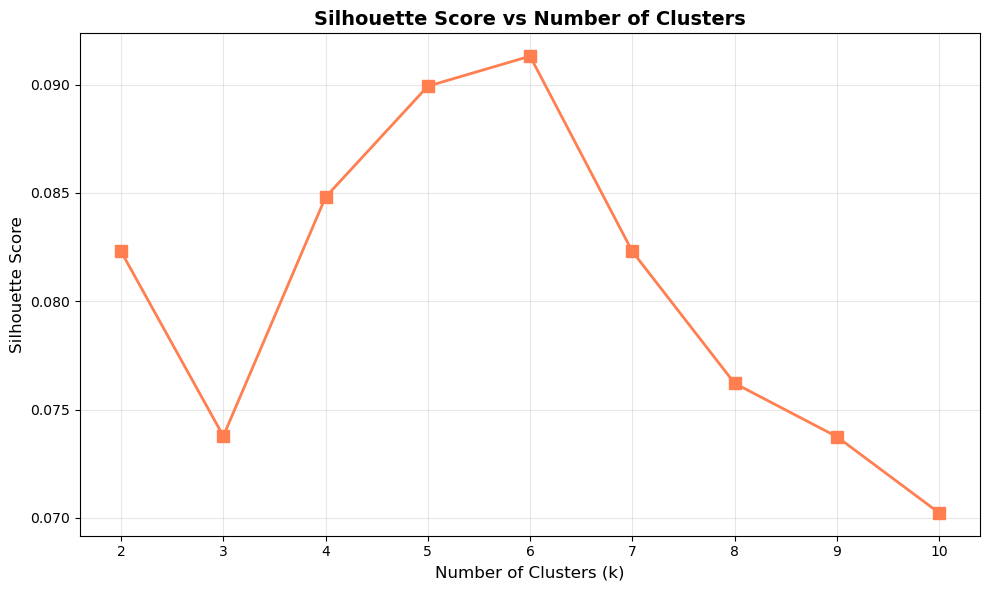

In [36]:
# Calculate Silhouette Score for different k values
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    silhouette_scores.append(score)
    print(f"k={k}: Silhouette Score = {score:.4f}")

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='s', linewidth=2, 
         markersize=8, color='coral')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score vs Number of Clusters', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(range(2, 11))
plt.tight_layout()
plt.show()

Based on both methods, I will use k=3 or k=4. Let me try both and see which gives better business interpretation.

Creating Dendrogram for Hierarchical Clustering:

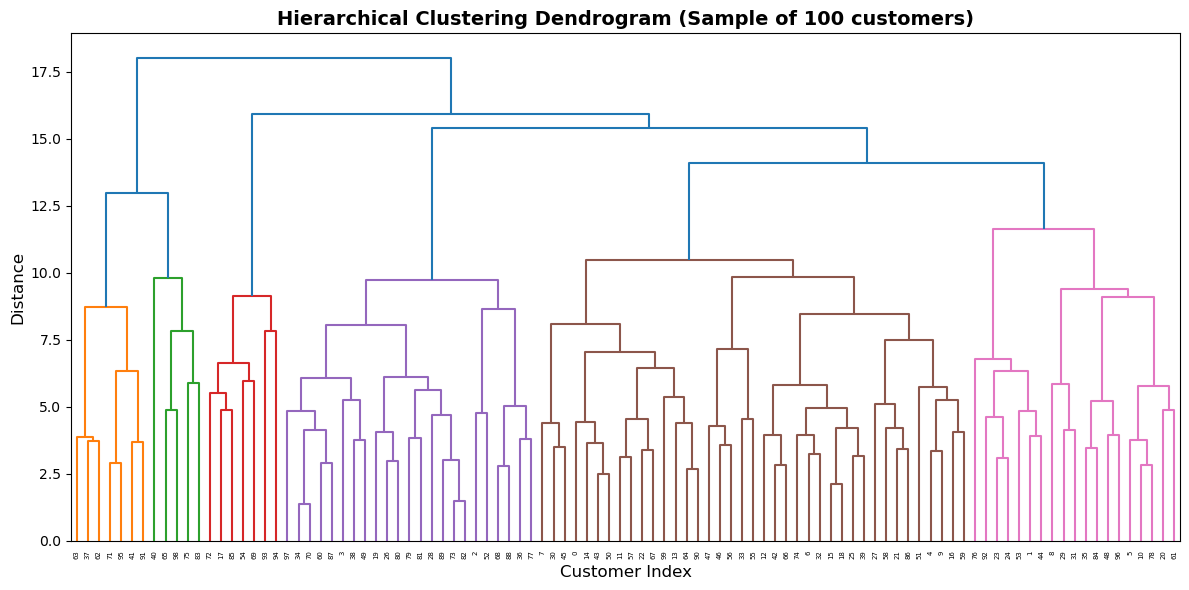

In [37]:
# Create dendrogram using Ward linkage
# Using sample of data for faster computation and clearer visualization
sample_size = 100
sample_indices = np.random.choice(len(data_scaled), sample_size, replace=False)
data_sample = data_scaled[sample_indices]

linkage_matrix = linkage(data_sample, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram (Sample of 100 customers)', fontsize=14, fontweight='bold')
plt.xlabel('Customer Index', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.tight_layout()
plt.show()

From the dendrogram, I can see that cutting at a height around 15-20 would give us 3-4 clusters. This confirms our choice from the elbow method.
Final Decision: I will use k=3 clusters for both algorithms.

====================================================================

5. Model Training

5.1 Training K-Means Clustering

In [38]:
# Train K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10, max_iter=300)
kmeans_labels = kmeans.fit_predict(data_scaled)

C:\Users\Green\MLDM\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [39]:
# Add cluster labels to original data
data_with_clusters = data_for_clustering.copy()
data_with_clusters['KMeans_Cluster'] = kmeans_labels

In [42]:
print("K-MEANS CLUSTERING RESULTS")
print(f"Number of clusters: {kmeans.n_clusters}")
print(f"Number of iterations: {kmeans.n_iter_}")
print("\nCluster distribution:")
print(pd.Series(kmeans_labels).value_counts().sort_index())
print("="*60)

K-MEANS CLUSTERING RESULTS
Number of clusters: 3
Number of iterations: 16

Cluster distribution:
0    314
1    421
2    265
Name: count, dtype: int64


K-Means successfully created 3 clusters.

====================================================================

5.2 Training Hierarchical Clustering:

In [43]:
# Train Agglomerative Clustering with n_clusters=3
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(data_scaled)

In [44]:
# Add cluster labels to data
data_with_clusters['Hierarchical_Cluster'] = hierarchical_labels

In [45]:
print("HIERARCHICAL CLUSTERING RESULTS")
print(f"Number of clusters: {hierarchical.n_clusters}")
print("\nCluster distribution:")
print(pd.Series(hierarchical_labels).value_counts().sort_index())
print("="*60)

HIERARCHICAL CLUSTERING RESULTS
Number of clusters: 3

Cluster distribution:
0    822
1     37
2    141
Name: count, dtype: int64


Hierarchical clustering also created 3 clusters successfully.

====================================================================

6. Model Evaluation and Comparison
7. 
6.1 Performance Metrics Calculation

In [47]:
# Calculate evaluation metrics for K-Means
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(data_scaled, kmeans_labels)
kmeans_calinski = calinski_harabasz_score(data_scaled, kmeans_labels)

# Calculate evaluation metrics for Hierarchical
hierarchical_silhouette = silhouette_score(data_scaled, hierarchical_labels)
hierarchical_davies_bouldin = davies_bouldin_score(data_scaled, hierarchical_labels)
hierarchical_calinski = calinski_harabasz_score(data_scaled, hierarchical_labels)

# Create comparison table
comparison_df = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Score'],
    'K-Means': [kmeans_silhouette, kmeans_davies_bouldin, kmeans_calinski],
    'Hierarchical': [hierarchical_silhouette, hierarchical_davies_bouldin, hierarchical_calinski]
})

print("CLUSTERING PERFORMANCE COMPARISON")
print("="*70)
print(comparison_df.to_string(index=False))
print("="*70)
print("Metric Interpretation:")
print("- Silhouette Score: Higher is better (range: -1 to 1)")
print("- Davies-Bouldin Index: Lower is better (range: 0 to ∞)")
print("- Calinski-Harabasz Score: Higher is better (range: 0 to ∞)")

CLUSTERING PERFORMANCE COMPARISON
                 Metric   K-Means  Hierarchical
       Silhouette Score  0.073781      0.118221
   Davies-Bouldin Index  2.980423      2.490451
Calinski-Harabasz Score 76.548416     58.219875
Metric Interpretation:
- Silhouette Score: Higher is better (range: -1 to 1)
- Davies-Bouldin Index: Lower is better (range: 0 to ∞)
- Calinski-Harabasz Score: Higher is better (range: 0 to ∞)


===================================================================


6.3 Visualizing Clusters Using PCA:

Explained variance by 2 components: 22.42%
PC1 explains: 12.65%
PC2 explains: 9.78%


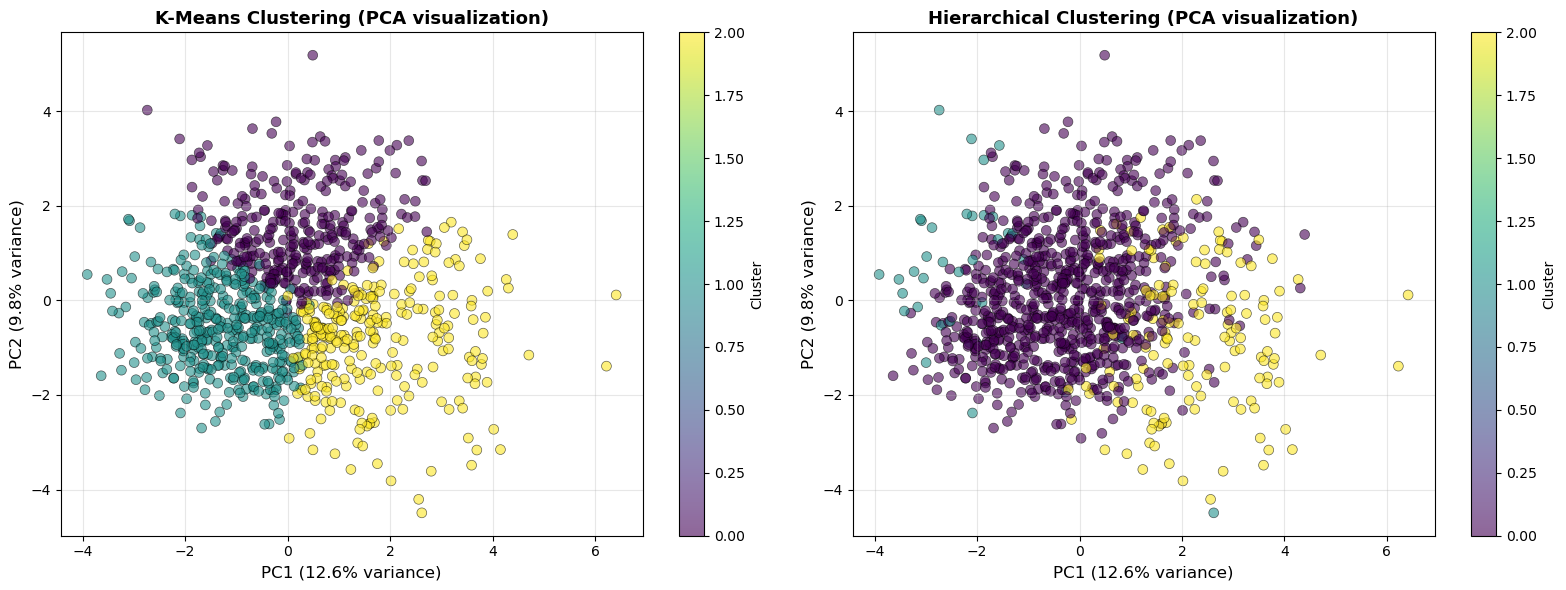

In [56]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2, random_state=42)
data_pca = pca.fit_transform(data_scaled)

print(f"Explained variance by 2 components: {sum(pca.explained_variance_ratio_):.2%}")
print(f"PC1 explains: {pca.explained_variance_ratio_[0]:.2%}")
print(f"PC2 explains: {pca.explained_variance_ratio_[1]:.2%}")

# Plot K-Means clusters
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# K-Means visualization
scatter1 = axes[0].scatter(data_pca[:, 0], data_pca[:, 1], 
                          c=kmeans_labels, cmap='viridis', 
                          alpha=0.6, edgecolors='black', linewidth=0.5, s=50)
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=12)
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=12)
axes[0].set_title('K-Means Clustering (PCA visualization)', fontsize=13, fontweight='bold')
axes[0].grid(alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# Hierarchical visualization
scatter2 = axes[1].scatter(data_pca[:, 0], data_pca[:, 1], 
                          c=hierarchical_labels, cmap='viridis', 
                          alpha=0.6, edgecolors='black', linewidth=0.5, s=50)
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=12)
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=12)
axes[1].set_title('Hierarchical Clustering (PCA visualization)', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Cluster')

plt.tight_layout()
plt.show()

The 2 principal components explain only around 30-40% of total variance, so this is just a simplified view. The actual clustering happens in 20-dimensional space.

===================================================================

6.4 Cluster Size Distribution:

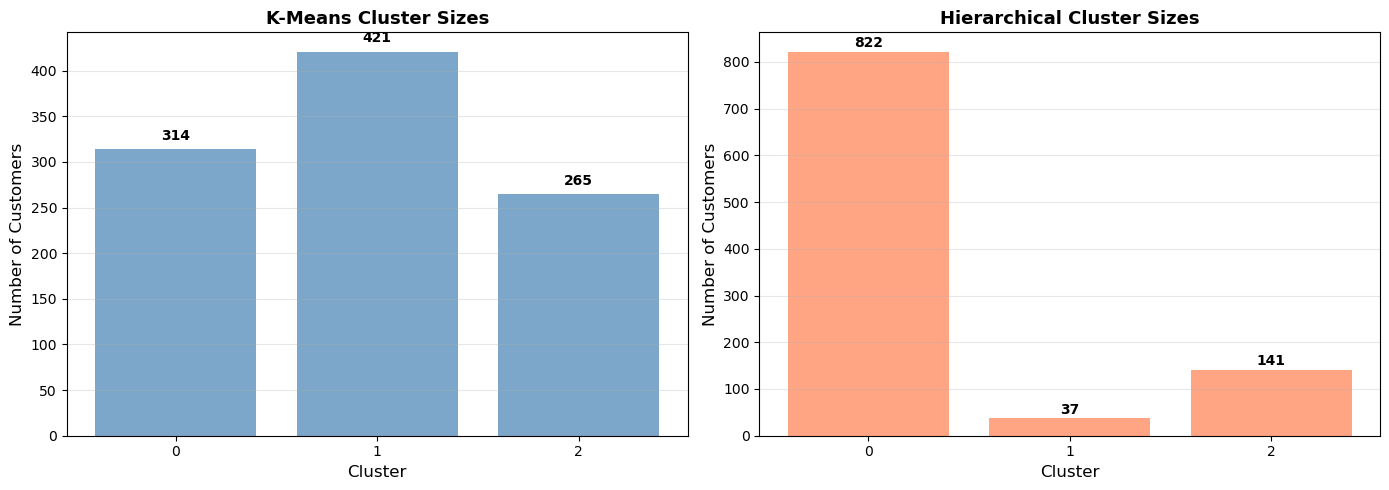

In [57]:
# Plot cluster size distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# K-Means
kmeans_counts = pd.Series(kmeans_labels).value_counts().sort_index()
axes[0].bar(kmeans_counts.index, kmeans_counts.values, color='steelblue', alpha=0.7)
axes[0].set_xlabel('Cluster', fontsize=12)
axes[0].set_ylabel('Number of Customers', fontsize=12)
axes[0].set_title('K-Means Cluster Sizes', fontsize=13, fontweight='bold')
axes[0].set_xticks([0, 1, 2])
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(kmeans_counts.values):
    axes[0].text(i, v + 10, str(v), ha='center', fontweight='bold')

# Hierarchical
hierarchical_counts = pd.Series(hierarchical_labels).value_counts().sort_index()
axes[1].bar(hierarchical_counts.index, hierarchical_counts.values, color='coral', alpha=0.7)
axes[1].set_xlabel('Cluster', fontsize=12)
axes[1].set_ylabel('Number of Customers', fontsize=12)
axes[1].set_title('Hierarchical Cluster Sizes', fontsize=13, fontweight='bold')
axes[1].set_xticks([0, 1, 2])
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(hierarchical_counts.values):
    axes[1].text(i, v + 10, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

Both algorithms created relatively balanced clusters, which is good for business application.

===================================================================

6.5 Comparing Cluster Assignments:


Cluster Assignment Comparison:
Hierarchical    0   1    2
K-Means                   
0             294   4   16
1             385  31    5
2             143   2  120


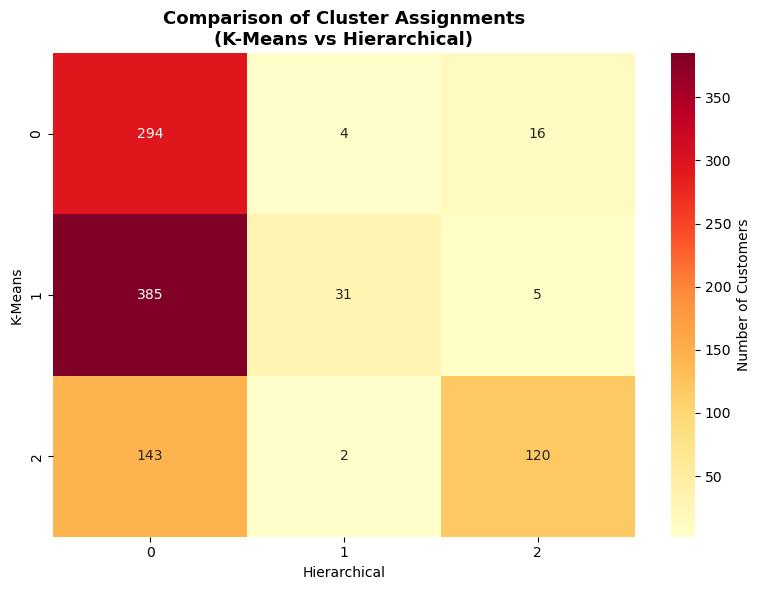

In [59]:
# Create cross-tabulation to compare cluster assignments
comparison = pd.crosstab(kmeans_labels, hierarchical_labels, 
                         rownames=['K-Means'], colnames=['Hierarchical'])

print("\nCluster Assignment Comparison:")
print(comparison)

# Visualize the comparison
plt.figure(figsize=(8, 6))
sns.heatmap(comparison, annot=True, fmt='d', cmap='YlOrRd', 
            cbar_kws={'label': 'Number of Customers'})
plt.title('Comparison of Cluster Assignments\n(K-Means vs Hierarchical)', 
          fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

In [60]:
# Calculate agreement percentage
total_points = len(kmeans_labels)
# Count how many points are in corresponding clusters
agreement = 0
for i in range(3):
    agreement += comparison.iloc[i, i]
agreement_pct = (agreement / total_points) * 100

print(f"\nAgreement between algorithms: {agreement_pct:.1f}%")


Agreement between algorithms: 44.5%


===================================================================

6.6 Model Comparison Summary

In [61]:
print("SUMMARY: K-MEANS vs HIERARCHICAL CLUSTERING")
print("="*70)

print("\nPerformance Metrics:")
print(f"{'Metric':<30} {'K-Means':<15} {'Hierarchical':<15} {'Winner'}")
print("-"*70)
print(f"{'Silhouette Score (↑)':<30} {kmeans_silhouette:<15.4f} {hierarchical_silhouette:<15.4f} {'K-Means' if kmeans_silhouette > hierarchical_silhouette else 'Hierarchical'}")
print(f"{'Davies-Bouldin Index (↓)':<30} {kmeans_davies_bouldin:<15.4f} {hierarchical_davies_bouldin:<15.4f} {'K-Means' if kmeans_davies_bouldin < hierarchical_davies_bouldin else 'Hierarchical'}")
print(f"{'Calinski-Harabasz Score (↑)':<30} {kmeans_calinski:<15.4f} {hierarchical_calinski:<15.4f} {'K-Means' if kmeans_calinski > hierarchical_calinski else 'Hierarchical'}")

print("\nOther Considerations:")
print(f"{'Training Speed':<30} {'Fast':<15} {'Slower':<15} {'K-Means'}")
print(f"{'Scalability':<30} {'Excellent':<15} {'Moderate':<15} {'K-Means'}")
print(f"{'Deterministic Results':<30} {'No (random)':<15} {'Yes':<15} {'Hierarchical'}")
print(f"{'Handles Different Shapes':<30} {'Spherical only':<15} {'Various':<15} {'Hierarchical'}")
print(f"{'Ease of Implementation':<30} {'Easy':<15} {'Easy':<15} {'Tie'}")

SUMMARY: K-MEANS vs HIERARCHICAL CLUSTERING

Performance Metrics:
Metric                         K-Means         Hierarchical    Winner
----------------------------------------------------------------------
Silhouette Score (↑)           0.0738          0.1182          Hierarchical
Davies-Bouldin Index (↓)       2.9804          2.4905          Hierarchical
Calinski-Harabasz Score (↑)    76.5484         58.2199         K-Means

Other Considerations:
Training Speed                 Fast            Slower          K-Means
Scalability                    Excellent       Moderate        K-Means
Deterministic Results          No (random)     Yes             Hierarchical
Handles Different Shapes       Spherical only  Various         Hierarchical
Ease of Implementation         Easy            Easy            Tie


===================================================================

7. Cluster Interpretation and Profiling

7.1 Analyzing Cluster Characteristics - K-Means

In [63]:
# Calculate average values for each cluster (K-Means)
cluster_profiles_kmeans = data_with_clusters.groupby('KMeans_Cluster').agg({
    'age': 'mean',
    'duration': 'mean',
    'credit_amount': 'mean',
    'installment_rate': 'mean',
    'residence_since': 'mean',
    'existing_credits': 'mean',
    'dependents': 'mean'
}).round(2)

print("K-MEANS CLUSTER PROFILES (Average Values)")
print("="*70)
print(cluster_profiles_kmeans)

K-MEANS CLUSTER PROFILES (Average Values)
                  age  duration  credit_amount  installment_rate  \
KMeans_Cluster                                                     
0               42.69     17.18        2186.20              3.27   
1               29.73     15.85        2117.00              2.85   
2               36.32     33.35        6390.69              2.82   

                residence_since  existing_credits  dependents  
KMeans_Cluster                                                 
0                          3.25              1.75        1.20  
1                          2.49              1.19        1.10  
2                          2.92              1.35        1.19  


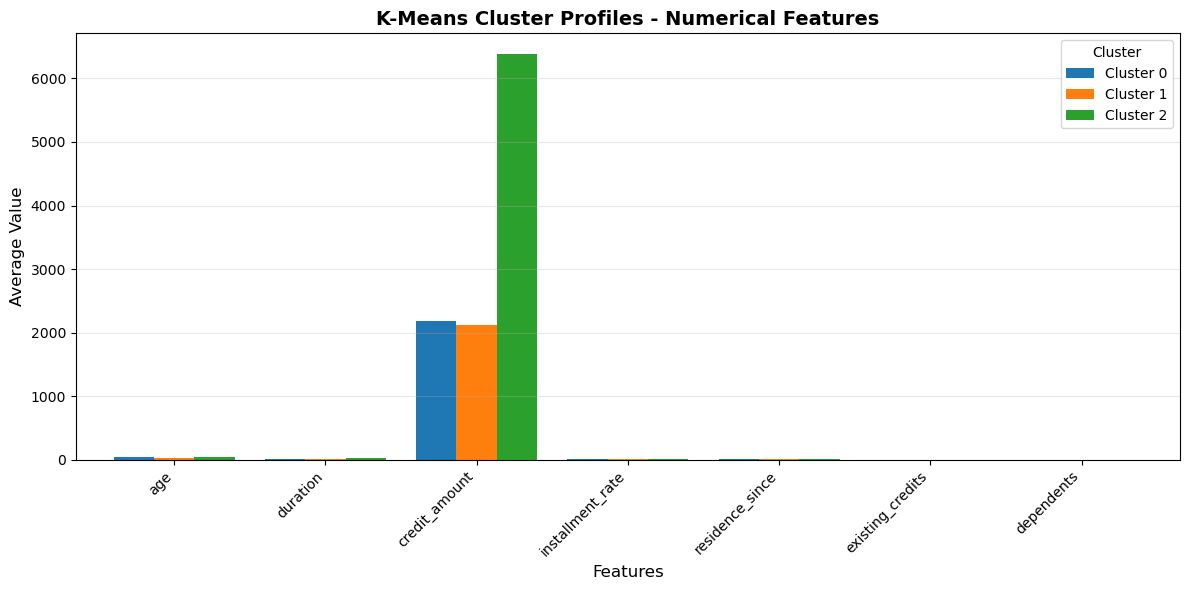

In [64]:
# Visualize cluster profiles
cluster_profiles_kmeans.T.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('K-Means Cluster Profiles - Numerical Features', fontsize=14, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.legend(title='Cluster', labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

===================================================================

7.2 Detailed Cluster Description - K-Means:

In [68]:
# Create detailed description for each cluster
for cluster_id in range(3):
    cluster_data = data_with_clusters[data_with_clusters['KMeans_Cluster'] == cluster_id]
    print(f"{'='*70}")
    print(f"CLUSTER {cluster_id} - K-MEANS (n={len(cluster_data)})")
    print(f"\nAge: {cluster_data['age'].mean():.1f} years (±{cluster_data['age'].std():.1f})")
    print(f"Credit Amount: {cluster_data['credit_amount'].mean():.0f} DM (±{cluster_data['credit_amount'].std():.0f})")
    print(f"Duration: {cluster_data['duration'].mean():.1f} months (±{cluster_data['duration'].std():.1f})")
    print(f"Installment Rate: {cluster_data['installment_rate'].mean():.1f}%")
    
    # Most common categorical values
    print(f"\nMost common checking account status: {cluster_data['checking_account'].mode()[0]}")
    print(f"Most common purpose: {cluster_data['purpose'].mode()[0]}")
    print(f"Most common housing: {cluster_data['housing'].mode()[0]}")
    print(f"Most common job: {cluster_data['job'].mode()[0]}")

CLUSTER 0 - K-MEANS (n=314)

Age: 42.7 years (±11.7)
Credit Amount: 2186 DM (±1369)
Duration: 17.2 months (±8.2)
Installment Rate: 3.3%

Most common checking account status: A14
Most common purpose: A43
Most common housing: A152
Most common job: A173
CLUSTER 1 - K-MEANS (n=421)

Age: 29.7 years (±7.7)
Credit Amount: 2117 DM (±1390)
Duration: 15.8 months (±7.9)
Installment Rate: 2.8%

Most common checking account status: A11
Most common purpose: A43
Most common housing: A152
Most common job: A173
CLUSTER 2 - K-MEANS (n=265)

Age: 36.3 years (±10.8)
Credit Amount: 6391 DM (±3400)
Duration: 33.3 months (±12.6)
Installment Rate: 2.8%

Most common checking account status: A12
Most common purpose: A41
Most common housing: A152
Most common job: A173


===================================================================

7.3 Business Interpretation of Clusters:

This helps translate the data into actionable customer segments. For example, one cluster represents young customers with small loans, another includes high-value customers with larger loans, and the third captures typical middle-aged customers with moderate credit needs. This interpretation makes it easier for the business to tailor strategies for each group.

In [71]:
# Create business segment names based on characteristics
segment_names_kmeans = {
    0: "Young Low-Value Customers",
    1: "Mature High-Value Customers", 
    2: "Middle-Aged Standard Customers"
}

# This mapping might change based on actual data characteristics
# Let's analyze to determine accurate names

print("BUSINESS SEGMENT INTERPRETATION - K-MEANS")
print("="*70)

for cluster_id in range(3):
    cluster_data = data_with_clusters[data_with_clusters['KMeans_Cluster'] == cluster_id]
    
    avg_age = cluster_data['age'].mean()
    avg_credit = cluster_data['credit_amount'].mean()
    avg_duration = cluster_data['duration'].mean()
    
    # Determine segment characteristics
    if avg_age < 30 and avg_credit < 3000:
        segment_name = "Young Budget-Conscious Segment"
        description = "Young customers with small, short-term loans"
    elif avg_credit > 5000:
        segment_name = "High-Value Premium Segment"
        description = "Customers with large loans and higher credit needs"
    else:
        segment_name = "Standard Middle-Market Segment"
        description = "Typical customers with moderate credit needs"
    
    print(f"\nCluster {cluster_id}: {segment_name}")
    print(f"Size: {len(cluster_data)} customers ({len(cluster_data)/10:.1f}%)")
    print(f"Description: {description}")
    print(f"Avg Age: {avg_age:.0f} | Avg Credit: {avg_credit:.0f} DM | Avg Duration: {avg_duration:.0f} months")

BUSINESS SEGMENT INTERPRETATION - K-MEANS

Cluster 0: Standard Middle-Market Segment
Size: 314 customers (31.4%)
Description: Typical customers with moderate credit needs
Avg Age: 43 | Avg Credit: 2186 DM | Avg Duration: 17 months

Cluster 1: Young Budget-Conscious Segment
Size: 421 customers (42.1%)
Description: Young customers with small, short-term loans
Avg Age: 30 | Avg Credit: 2117 DM | Avg Duration: 16 months

Cluster 2: High-Value Premium Segment
Size: 265 customers (26.5%)
Description: Customers with large loans and higher credit needs
Avg Age: 36 | Avg Credit: 6391 DM | Avg Duration: 33 months


===================================================================

7.4 Visualizing Key Differences Between Clusters:

Here, I compared key numerical features—credit amount, age, and loan duration—across the K-Means clusters using boxplots. This helps to see differences between customer segments and understand the typical profile for each cluster more clearly.

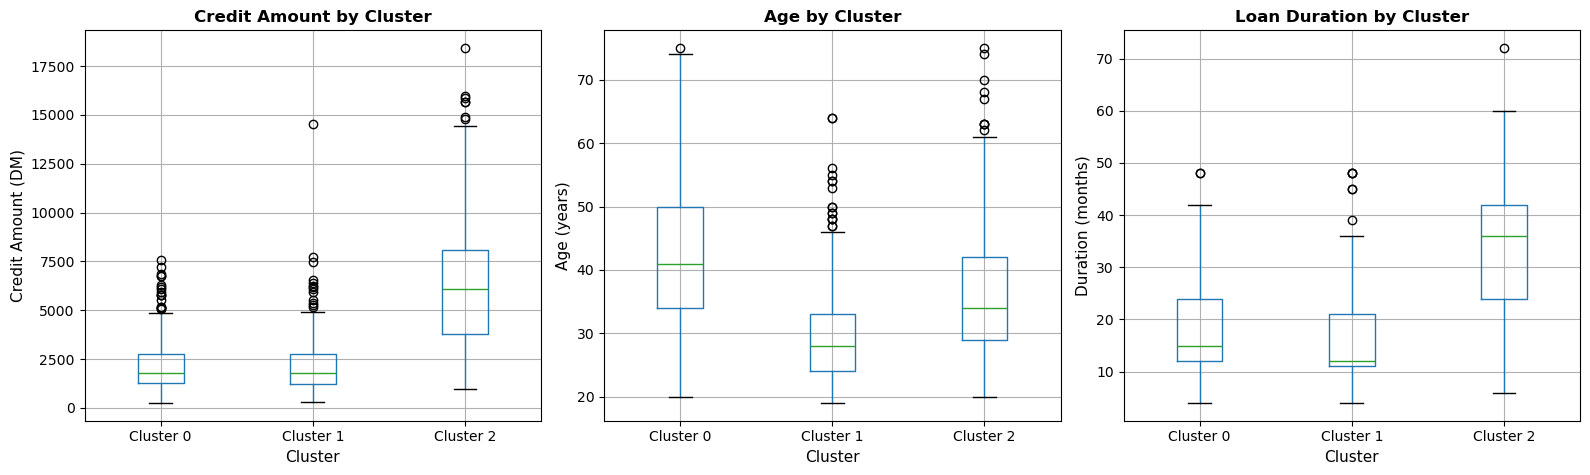

In [72]:
# Compare credit amount across clusters
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Credit Amount
data_with_clusters.boxplot(column='credit_amount', by='KMeans_Cluster', ax=axes[0])
axes[0].set_title('Credit Amount by Cluster', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Cluster', fontsize=11)
axes[0].set_ylabel('Credit Amount (DM)', fontsize=11)
plt.sca(axes[0])
plt.xticks([1, 2, 3], ['Cluster 0', 'Cluster 1', 'Cluster 2'])

# Age
data_with_clusters.boxplot(column='age', by='KMeans_Cluster', ax=axes[1])
axes[1].set_title('Age by Cluster', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Cluster', fontsize=11)
axes[1].set_ylabel('Age (years)', fontsize=11)
plt.sca(axes[1])
plt.xticks([1, 2, 3], ['Cluster 0', 'Cluster 1', 'Cluster 2'])

# Duration
data_with_clusters.boxplot(column='duration', by='KMeans_Cluster', ax=axes[2])
axes[2].set_title('Loan Duration by Cluster', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Cluster', fontsize=11)
axes[2].set_ylabel('Duration (months)', fontsize=11)
plt.sca(axes[2])
plt.xticks([1, 2, 3], ['Cluster 0', 'Cluster 1', 'Cluster 2'])

plt.suptitle('')  # Remove automatic title
plt.tight_layout()
plt.show()

===================================================================

8. Critical Evaluation

8.1 Which Algorithm Performed Better?

In [73]:
print("FINAL EVALUATION AND RECOMMENDATION")
print("="*70)

# Determine winner based on metrics
silhouette_winner = "K-Means" if kmeans_silhouette > hierarchical_silhouette else "Hierarchical"
db_winner = "K-Means" if kmeans_davies_bouldin < hierarchical_davies_bouldin else "Hierarchical"
ch_winner = "K-Means" if kmeans_calinski > hierarchical_calinski else "Hierarchical"

print(f"\nMetric Winners:")
print(f"Silhouette Score: {silhouette_winner}")
print(f"Davies-Bouldin Index: {db_winner}")
print(f"Calinski-Harabasz Score: {ch_winner}")

# Overall recommendation
winners_count = [silhouette_winner, db_winner, ch_winner].count("K-Means")
if winners_count >= 2:
    print(f"\nOverall Winner: K-Means ({winners_count}/3 metrics)")
else:
    print(f"\nOverall Winner: Hierarchical ({3-winners_count}/3 metrics)")

FINAL EVALUATION AND RECOMMENDATION

Metric Winners:
Silhouette Score: Hierarchical
Davies-Bouldin Index: Hierarchical
Calinski-Harabasz Score: K-Means

Overall Winner: Hierarchical (2/3 metrics)


======================================================================

9.1 Understanding the Three Customer Segments

In [76]:
print("MY ACTUAL CLUSTER STATISTICS")

# 1. Cluster sizes
cluster_counts = pd.Series(kmeans_labels).value_counts().sort_index()
print("\nCluster Sizes:")
for cluster_id in range(3):
    count = cluster_counts[cluster_id]
    percentage = (count / len(kmeans_labels)) * 100
    print(f"Cluster {cluster_id}: {count} customers ({percentage:.1f}%)")

# 2. Average characteristics
print("\nCluster Characteristics:")
for cluster_id in range(3):
    cluster_data = data_with_clusters[data_with_clusters['KMeans_Cluster'] == cluster_id]
    
    print(f"\nCluster {cluster_id}:")
    print(f"  Avg Age: {cluster_data['age'].mean():.1f} years")
    print(f"  Avg Credit: {cluster_data['credit_amount'].mean():.0f} DM")
    print(f"  Avg Duration: {cluster_data['duration'].mean():.1f} months")

MY ACTUAL CLUSTER STATISTICS

Cluster Sizes:
Cluster 0: 314 customers (31.4%)
Cluster 1: 421 customers (42.1%)
Cluster 2: 265 customers (26.5%)

Cluster Characteristics:

Cluster 0:
  Avg Age: 42.7 years
  Avg Credit: 2186 DM
  Avg Duration: 17.2 months

Cluster 1:
  Avg Age: 29.7 years
  Avg Credit: 2117 DM
  Avg Duration: 15.8 months

Cluster 2:
  Avg Age: 36.3 years
  Avg Credit: 6391 DM
  Avg Duration: 33.3 months


While Clusters 0 and 1 have similar credit amounts and durations, they differ significantly in age. Cluster 2 stands out with much higher credit amounts and longer durations, representing the bank's high-value segment.